In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 설치 후 [런타임 → 세션 다시 시작]

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

한국보건사회연구원에서 제공하는‘한국복지패널데이터’는 국내 가구의 경제활동을 연구해 정책지원에 반영할 목적으로 발간하는 조사 자료다. 전국에서 7,000여 가구를 선정해 2006년부터 매년 추적 조사한 자료로, 경제활동, 생활실태, 복지욕구 등 천여 개 변수로 구성되어 있다. 본 데이터는 아래 사이트에서 다운로드 할 수 있다.

https://www.koweps.re.kr:442/data/data/list.do

이 중 성별, 태어난 연도, 교육 수준, 지역 코드, 월급만 정리한 결과는 다음과 같다.

In [ ]:
!gdown https://drive.google.com/uc?id=10-VvAvdOdfiDEOmy8V_yFujzMtlyoRrj

Downloading...
From: https://drive.google.com/uc?id=10-VvAvdOdfiDEOmy8V_yFujzMtlyoRrj
To: /content/welfare.csv
100% 253k/253k [00:00<00:00, 35.0MB/s]


In [ ]:
import pandas as pd

In [ ]:
welfare = pd.read_csv('welfare.csv')

welfare.head()

,성별,연도,교육,지역,월급
0,2,1945,4,1,NaN
1,1,1948,3,1,172.0
2,1,1942,7,1,100.0
3,1,1962,6,1,268.0
4,2,1963,5,1,140.0


## 성별에 따른 월급 차이

먼저 남/녀 성별에 따라 월급에 차이가 있는지 살펴보도록 하자.

In [ ]:
welfare['성별'].value_counts()

성별
2    9120
1    7471
Name: count, dtype: int64

`value_counts()` 함수를 이용하면 특정 열 고유값의 갯수를 구할 수 있다. 두 집단 모두 충분한 데이터가 있음이 확인된다. 이 중 1과 2가 어떤 성별을 의미하는지는 코드북에서 찾아볼 수 있다. 남자는 1, 여자는 2로 입력되어 있으며, 이를 이해하기 쉽게 각각 남과 여로 변경한다.

In [ ]:
import numpy as np

welfare['성별'] = np.where(welfare['성별'] == 1, '남', '여')

남녀 비율을 시각해보자.

<Axes: xlabel='성별'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missi

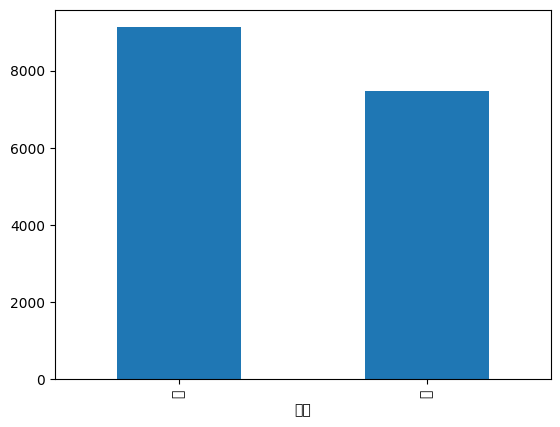

In [ ]:
welfare['성별'].value_counts().plot.bar()

여성의 비율이조금 더 높다. 이번에는 월급 변수를 확인해보자.

In [ ]:
welfare['월급'].describe()

월급이 0인 경우도 있으며, NA 즉 월급 정보가 없는 데이터도 꽤나 있다. 이는 향후 데이터분석시 제거해야 할 대상이다. 월급이 0인 경우 NA로 변경한다.

In [ ]:
welfare['월급'] = np.where(welfare['월급'] == 0, np.nan, welfare['월급'])

이번에는 성별에 따른 월급의 차이를 분석한다.

<Axes: xlabel='성별'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missi

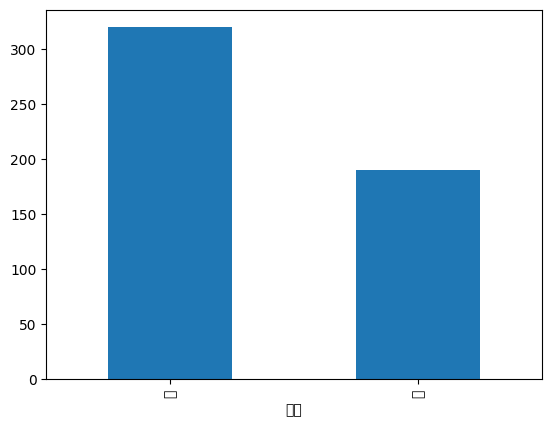

In [ ]:
# 결측치 제거
welfare = welfare.dropna(subset=['월급'])

# 성별로 그룹화하고 중간값 계산
welfare.groupby('성별')['월급'].median().plot.bar()

남성의 평균임금이 여성의 평균임금보다 훨씬 높다.

## 나이에 따른 월급의 관계

데이터는 출생 연도가 들어와 있으므로, 측정시점인 2022년 기준으로 나이를 계산한다.

In [ ]:
welfare['나이'] = 2022 - welfare['연도']

이제 나이에 따른 월급을 살펴보자.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


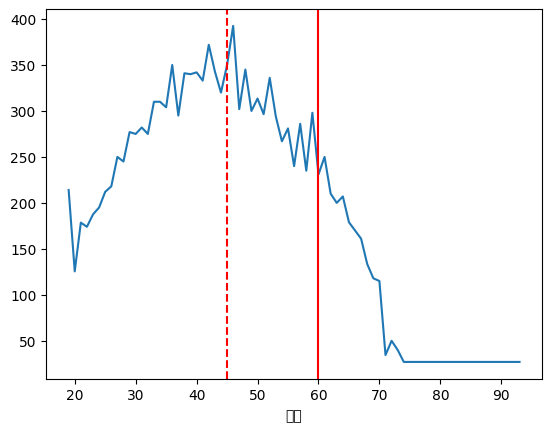

In [ ]:
import matplotlib.pyplot as plt

welfare.groupby('나이')['월급'].median().plot()
plt.axvline(x=45, color='red', linestyle='--')
plt.axvline(x=60, color='red')
plt.show()

45세 가량 피크를 찍은 후, 점차 감소하는 모습을 보인다. 70세부터는 실질적으로 수입이 없는 모습이다. 다만 72~74세에 튀는 데이터가 있음을 유의한다.

이번에는 연령대를 나눠보도록 하겠다. 30세 미만은 초년, 50세 이하는 중년, 그 이상은 노년으로 구분한다.

In [ ]:
welfare['연령대'] = welfare['나이'].apply(lambda x: '초년' if x < 30 else ('중년' if x <= 50 else '노년'))

이번에는 연령대 별 월급의 차이를 살펴보자.

In [ ]:
welfare.groupby(['연령대']).median('월급')['월급'].plot.bar()

초년 이후 중년에 월급이 늘었다가 노년에 다시 감소한다.

## 성별, 나이와 월급의 관계

이번에는 성별과 나이에 따른 월급의 관계를 살펴보자.

In [ ]:
import seaborn as sns

grouped  = welfare.groupby(['성별', '연령대'])['월급'].median().reset_index()
sns.barplot(data=grouped, x='연령대', y='월급', hue='성별', dodge=True, palette='viridis')

전 연령대에서 남성이 여성보다 월급이 많다. 특히나 노년에서 차이가 많이 난다.

In [ ]:
grouped_2 = welfare.groupby(['성별', '나이'])['월급'].median().reset_index()
sns.lineplot(data=grouped_2, x='나이', y='월급', hue='성별', linewidth=1.4)

## 학력, 성별에 따른 월급 차이

이번에는 학력과 성별에 따른 월급의 차이를 살펴보겠다. 학력은 1~9개 값으로 나타나 있으며, 각 값이 의미하는 바 역시 코딩북에 나와있다.

1. 미취학(만7세미만)
2. 무학(만7세이상)
3. 초등학교
4. 중학교
5. 고등학교
6. 전문대학
7. 대학교
8. 대학원(석사)
9. 대학원(박사)

In [ ]:
welfare['교육'].value_counts(normalize = True).sort_index()

교육
2    0.027610
3    0.109191
4    0.078732
5    0.295511
6    0.151942
7    0.292661
8    0.037585
9    0.006769
Name: proportion, dtype: float64

학력을 보기 쉽게 한글로 변환한다.

In [ ]:
# 교육 단계에 대한 맵핑 사전 생성
education_mapping = {
    1: '1_미취학(만7세미만)',
    2: '2_무학(만7세이상)',
    3: '3_초등학교',
    4: '4_중학교',
    5: '5_고등학교',
    6: '6_전문대학',
    7: '7_대학교',
    8: '8_대학원(석사)',
    9: '9_대학원(박사)'
}

welfare['교육'] = welfare['교육'].map(education_mapping).fillna('NA')

학력에 따른 월급을 살펴보도록 하자.

<Axes: xlabel='교육'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  func(*args,

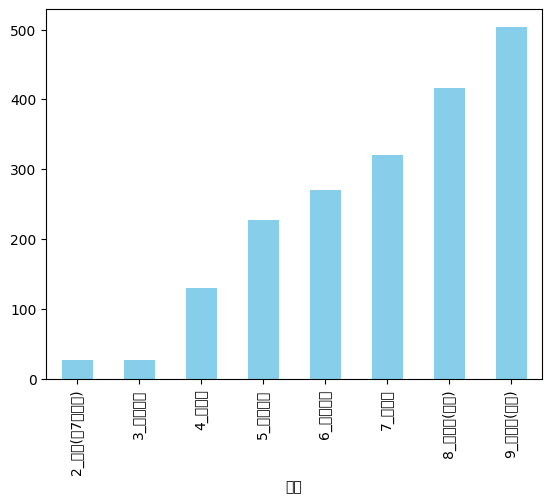

In [ ]:
welfare.groupby('교육')['월급'].median().plot(kind='bar', color='skyblue')

성별에 따른 학력과 임금의 차이를 살펴보자.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

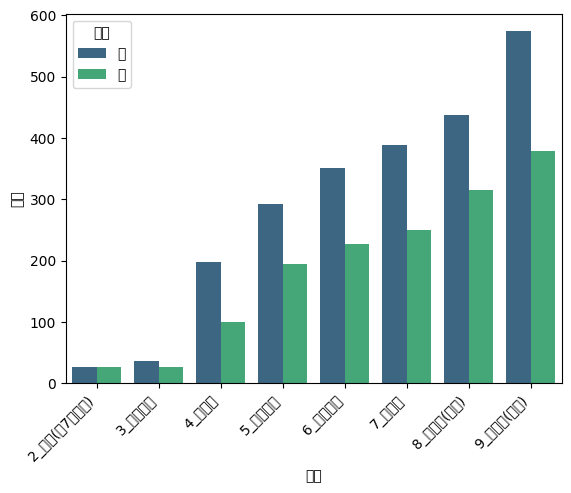

In [ ]:
import seaborn as sns

grouped_3 = welfare.groupby(['성별', '교육'])['월급'].median().reset_index()
sns.barplot(data=grouped_3, x='교육', y='월급', hue='성별', dodge=True, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.show()

모든 교육수준에서 남성의 임금이 여성보다 높다.